# [실습] 프로젝트 (1) : 포켓몬 데이터 분석하기 
## 포켓몬 데이터 뭉치에서 전설 포켓몬을 골라낼 수 있을까?

데이터 분석 프로젝트를 통한 탐색적 데이터 분석(EDA) 연습하기

### 학습 목표
- 속성, 스탯 등 여러가지 데이터가 있는 포켓몬 데이터셋을 활용해서 `전설 포켓몬`의 특징을 파악합니다.
- 데이터 분포를 확인하고, 변수간 관계를 파악하는 EDA를 통해 데이터 전체를 명확히 이해합니다.
- EDA를 진행하는 과정에서 다양한 파이썬 함수 사용, 시각화 방법, 그래프 해석 방법을 학습합니다. 

---

# Contents
**1. [데이터 분석 준비하기](#1.-데이터-분석-준비하기)**   

**2. [EDA #1: 전설 포켓몬 데이터 셋 분리하기](#2.EDA-#1:-전설-포켓몬-데이터-셋-분리하기)**   


**3. [EDA #2: 모든 컬럼 뜯어보기](#3.-EDA-#2:-모든-컬럼-뜯어보기)**

---

## 1. 데이터 분석 준비하기

본격적으로 데이터 분석 프로젝트를 시작하기에 앞서, 먼저 앞으로의 데이터 분석에 필요한 module을 import 해 봅니다.    
1장에서 사용했던 데이터 분석을 위한 파이썬 라이브러리인 `numpy`, `pandas`, `matplotlib`, `seaborn` 을 사용해 보겠습니다.

### 1-1. Import Modules

In [29]:
# numpy
import numpy as np

# pandas
import pandas as pd

# seaborn
import seaborn as sns

# matplotlib의 pyplot
import matplotlib.pyplot as plt
# matplotlib 시각화 결과를 jupyter notebook에서 바로 확인하기 위한 코드 작성 
%matplotlib inline

### 1-2. Load Dataset

모듈 임포트를 완료하였다면, 이제 이번 프로젝트에서 사용할 포켓몬 데이터셋을 가져와 보겠습니다. 

데이터 출처 : [Kaggle(캐글)](https://www.kaggle.com/abcsds/pokemon) 

엘리스에서는 이번 프로젝트에서 사용할 포켓몬 데이터 셋을 이미 실습 파일 목록에 함께 업로드하였기 때문에    
별개로 저장 및 업로드를 하시지 않아도 실습 진행이 가능합니다. 

**참고 - Dataset Description 살펴보기**

```
This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

이 데이터 셋에는 번호, 이름, 첫 번째 및 두 번째 유형 및 HP, 공격력, 방어력, 특수 공격, 특수 방어 및 속도와 같은 기본 통계를 포함한 721 개의 포켓몬이 포함되어 있습니다. 이 데이터 셋은 아이들에게 통계를 가르칠 때 매우 유용하며, 특정 유형의 경우 기계 학습(머신 러닝)에 대한 소개를 제공할 수 있습니다.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

게임 내에서 공격이 얼마나 많은 피해를 줄지 계산하는 데 사용되는 기본 속성입니다. 이 데이터 셋은 포켓몬 게임에 관한 것입니다 (포켓몬 카드 또는 포켓몬 고에 관한 데이터는 아닙니다.)

The data for this table has been acquired from several different sites, including:

pokemon.com
pokemondb
bulbapedia

이 테이블의 데이터는 다음을 포함하여 여러 다른 사이트에서 얻었습니다.

One question has been answered with this database: The type of a pokemon cannot be inferred only by it's Attack and Deffence. It would be worthy to find which two variables can define the type of a pokemon, if any. Two variables can be plotted in a 2D space, and used as an example for machine learning. This could mean the creation of a visual example any geeky Machine Learning class would love.

이 데이터베이스에 대한 질문과 그에 대한 답은 다음과 같습니다 : 포켓몬의 유형은 공격과 방어만으로 유추 할 수 없습니다. 포켓몬의 유형을 정의 할 수있는 두 변수를 찾는 것이 좋습니다. 2D 공간에 2 개의 변수를 시각화 할 수 있으며 이는 기계 학습(머신 러닝)의 예시로 사용됩니다. 이것은 머신 러닝 수업에서 좋아할만한 시각적 인 예를 만들어내는 것을 의미 할 수 있습니다.
```


본격적으로 파이썬 라이브러리인 `pandas`를 활용해 데이터를 가져와봅니다.

In [30]:
# read_csv로 csv 파일을 불러옵니다.pandas를 활용해 데이터를 가져와보도록 하겠습니다.
pokemon = pd.read_csv('Pokemon.csv')
# 데이터프레임의 크기를 확인합니다.
print(pokemon.shape)

# 데이터프레임 상위 5개 값 확인
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


전체 데이터는 **800개**로 800마리의 포켓몬 데이터가 있고, 각 포켓몬의 속성은 총 **13개**로 구성되어있음을 shape 함수를 통해 확인할 수 있습니다.

#### 각 컬럼에 대한 설명
각 컬럼이 나타내는 바는 다음과 같습니다.  

변수명 | 의미 
- | - 
**#** | <center>포켓몬 Id number</center> 
**Name** | <center>포켓몬의 이름</center> 
**Type 1** | <center>첫 번째 속성</center>   
**Type 2** | <center>두 번째 속성</center> 
**Total** | <center>전체 6가지 스탯의 총합</center> 
**HP** | <center>포켓몬의 체력</center> 
**Attack** | <center>물리공격력 (scratch, punch 등)</center>  
**Defense** | <center>물리공격에 대한 방어력</center> 
**Sp. Atk** | <center>특수공격력 (fire blast, bubble beam 등)</center>  
**Sp. Def** | <center>특수공격에 대한 방어력.</center> 
**Speed** | <center>포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정.<br>(더 높은 포켓몬이 먼저 공격한다)</center>  
**Generation** | <center>포켓몬의 세대. 현재 데이터에는 6세대까지 있다.</center>  
**Legendary** | <center>전설의 포켓몬 여부. **!! Target feature !!**</center>  

### 1-3. 데이터 기본 확인 및 전처리하기

In [31]:
# info 확인하기
pokemon.info

<bound method DataFrame.info of        #                       Name    Type 1  Type 2  Total   HP  Attack  \
0      1                  Bulbasaur     Grass  Poison    318   45      49   
1      2                    Ivysaur     Grass  Poison    405   60      62   
2      3                   Venusaur     Grass  Poison    525   80      82   
3      3      VenusaurMega Venusaur     Grass  Poison    625   80     100   
4      4                 Charmander      Fire     NaN    309   39      52   
5      5                 Charmeleon      Fire     NaN    405   58      64   
6      6                  Charizard      Fire  Flying    534   78      84   
7      6  CharizardMega Charizard X      Fire  Dragon    634   78     130   
8      6  CharizardMega Charizard Y      Fire  Flying    634   78     104   
9      7                   Squirtle     Water     NaN    314   44      48   
10     8                  Wartortle     Water     NaN    405   59      63   
11     9                  Blastoise     Wate

결측치를 제거해야 할지 여부를 결정하기 위해 `Type 2` 컬럼을 조금 더 자세히 살펴보겠습니다. 

#### 결측치 확인하기

In [32]:
# 컬럼별 결측치 한번 더 확인해보기
pokemon.isnull().head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False


In [33]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [34]:
# 직접 결측된 데이터를 눈으로 확인해보기
pokemon['Type 2'][pokemon['Type 2'].isnull()]

4      NaN
5      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
24     NaN
25     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
37     NaN
38     NaN
40     NaN
41     NaN
42     NaN
43     NaN
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
60     NaN
      ... 
721    NaN
722    NaN
724    NaN
725    NaN
727    NaN
732    NaN
733    NaN
737    NaN
738    NaN
739    NaN
740    NaN
741    NaN
742    NaN
744    NaN
745    NaN
746    NaN
747    NaN
752    NaN
753    NaN
754    NaN
755    NaN
762    NaN
763    NaN
770    NaN
774    NaN
775    NaN
776    NaN
788    NaN
789    NaN
792    NaN
Name: Type 2, Length: 386, dtype: object

- Type 2가 결측되어 있어도 다른 컬럼에 대한 정보는 모두 채워져 있기 때문에 바로 제거하자는 주장을 펼치기엔 위험 가능성이 너무 크겠군요!

---

## 2. EDA #1: 전설 포켓몬 데이터 셋 분리하기

전설 포켓몬과 일반 포켓몬 데이터를 분리하여 각각 다른 변수에 저장해보겠습니다.    
전설 포켓몬인지에 대한 정보가 저장되어 있는 컬럼, 즉 `Legendary`(전설의 포켓몬인지 아닌지의 여부) 값을 활용하면 
쉽게 분리할 수 있습니다.

In [44]:
# Legendary 컬럼 값이 True 인 경우 legendary 변수에 저장하기
# 기존 index값 변경
legendary = pokemon[pokemon['Legendary'] == True].reset_index(drop = True)

# 데이터프레임의 크기를 확인합니다.
print(legendary.shape)

# 데이터프레임 상위 5개 값 확인
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


- 전체 데이터 개수가 800개였던 것을 기억해보면, 전설 포켓몬은 800개 중 65개밖에 존재하지 않음을 확인했습니다. 

전체 데이터 개수 중 전설 포켓몬 데이터의 비율을 간단한 코드 작성을 통해 확인해보겠습니다. 

In [45]:
# 전체 데이터 중 전설 포켓몬 데이터의 비율을 출력해봅니다.
print("전체 데이터 중 전설 포켓몬 데이터 비율 : {}% ".format(legendary.shape[0]/pokemon.shape[0] * 100))

전체 데이터 중 전설 포켓몬 데이터 비율 : 8.125% 


나머지 일반 포켓몬 데이터를 분리해보겠습니다. 

In [46]:
# 일반 포켓몬 데이터를 분리하여 변수에 저장하기
ordinary = pokemon[pokemon['Legendary'] == False].reset_index(drop=True)

# 데이터프레임 크기 확인하기
print(ordinary.shape)

# 상위 5개 값 확인하기
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 3. EDA #2: 모든 컬럼 뜯어보기

그럼 이제 본격적으로 데이터 내에 존재하는 각 컬럼을 하나씩 살펴보도록 하겠습니다.    

먼저 전체 컬럼 이름을 확인해보겠습니다. 

In [51]:
# pkemon 데이터셋 컬럼 출력하기
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

- 전체 13개 컬럼이 존재하고, 각 컬럼명을 list로 확인해보았습니다. 

### (1) 첫 번째 컬럼  `#` : id number

In [53]:
# 총 몇개의 #(id number)값이 있는지 확인해보기
len(pokemon['#'].unique())

721

- 전체 데이터는 총 800개인데 `#` 컬럼값 그보다 작은 **721개**의 데이터를 가집니다.     

In [54]:
# 같은 #(id number)값을 가지는 데이터 빈도 수 확인을 통해 알아보기
pokemon['#'].value_counts()

479    6
386    4
711    4
710    4
150    3
6      3
413    3
646    3
303    2
302    2
648    2
65     2
555    2
487    2
308    2
254    2
306    2
310    2
492    2
214    2
384    2
383    2
382    2
647    2
641    2
645    2
94     2
115    2
445    2
257    2
      ..
455    1
454    1
453    1
452    1
451    1
450    1
449    1
447    1
467    1
468    1
469    1
470    1
490    1
489    1
488    1
486    1
485    1
484    1
483    1
482    1
481    1
480    1
478    1
477    1
476    1
474    1
473    1
472    1
471    1
1      1
Name: #, Length: 721, dtype: int64

- #(id number) 479번 데이터가 6개 있네요, 이 데이터를 출력해보며 실제로 눈으로 확인해보겠습니다.   

In [55]:
# id number 479번 확인하기
pokemon[pokemon['#'] == 479]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
532,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False
533,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4,False
534,479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86,4,False
535,479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86,4,False
536,479,RotomMow Rotom,Electric,Grass,520,50,65,107,105,107,86,4,False


- `Rotom` 이라고 하는 동일한 이름에서 `RotomHeat` , `RotomWash`, `RotomFrost` 와 같은 단어들이 앞에 붙어 있는 포켓몬들이 동일한 id number로 존재하는 것을 확인할 수 있습니다. 
- 다른 중복값도 한번 살펴볼까요?

In [57]:
# id number 386번 확인하기
pokemon[pokemon['#'] == 386]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


- id number 가 386번인 경우도 동일한 단어들이 이름 내에 포함되어 있는 것을 확인할 수 있습니다. 

### (2) 두 번째 컬럼 `Name` : 이름

In [58]:
# 총 몇 개의 이름이 있는지 확인해보기
len(pokemon['Name'].unique())

800

- 이름 컬럼의 고유 값의 개수는 데이터셋 전체 크기와 동일한 800개로, 이는 모든 포켓몬의 이름이 동일하지 않음을 의미합니다. 

#### 특정 단어가 들어가있는 이름

In [61]:
# 바로 확인해보자

# 이름이 비슷한 전설의 포켓몬들의 모임 names
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


먼저, 위에서 중복된 #(id number)컬럼을 통해 확인했듯이 전설의 포켓몬 중에는 이름이 한 이름에서 파생되어 만들어진 이름들이 있죠. 

In [60]:
# 이름이 세트로 지어져있는 포켓몬들의 모임 set_names
sn1, sn2 = names[:13], names[23:]
set_names = pd.concat([sn1, sn2]).reset_index(drop=True)
set_names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


어떤가요? 이들은 모두 세트로 이름이 지어져 있습니다.    
- **"MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem"** 등의 이름에서부터 그 앞에 성이 붙여진다.
- 따라서 포켓몬 원형이 전설 포켓몬일 경우 해당 포켓몬의 성이 붙으면 그 포켓몬도 전설 포켓몬이다 라는 것을 알 수 있습니다.

#### 긴 이름

특정 단어가 포함되어있는지 여부 뿐만 아니라 이름의 길이는 어떨까요? 
데이터셋에 이름 길이 컬럼을 생성해서 비교해보도록 합니다.

apply를 활용하여 이름의 길이를 반환하여 name_count라는 이름의 새로운 컬럼으로 추가해주도록 하겠습니다. 

In [62]:
# legendary에 이름 길이 컬럼 생성
legendary['name_count'] = legendary['Name'].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [63]:
# ordinary에 이름 길이 컬럼 생성
ordinary['name_count'] = ordinary['Name'].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


그렇다면 새롭게 추가한 이 `name_count` 컬럼은 어떤 특징을 갖게 될까요? 직접 그래프로 그려 시각화해보도록 하겠습니다. 

Text(0.5,1,'ordinary')

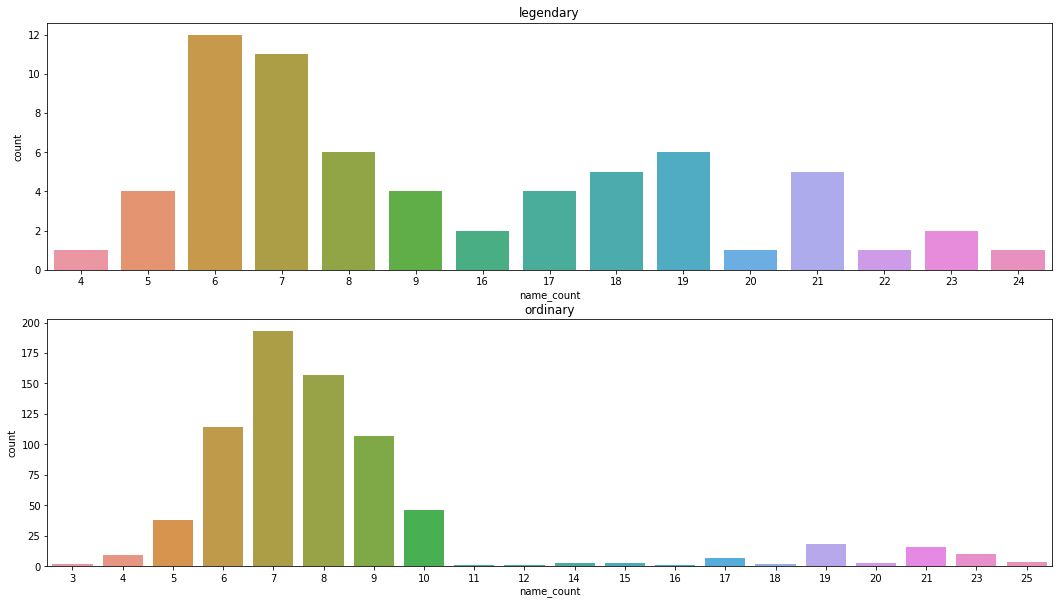

In [65]:
# 새롭게 추가한 이름 길이 컬럼 시각화
plt.figure(figsize = (18,10))

plt.subplot(211)
sns.countplot(data = legendary, x = "name_count")
plt.title("legendary")

plt.subplot(212)
sns.countplot(data = ordinary, x = "name_count")
plt.title("ordinary")

- 그래프를 통해 확인한 결과 **전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은** 반면, **일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮습니다.**

In [66]:
# 전설의 포켓몬의 이름이 10 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [68]:
# 일반 포켓몬의 이름이 10 이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


- **전설의 포켓몬의 이름이 10 이상일 확률은 41%** 를 넘는 반면, **일반 포켓몬의 이름이 10 이상일 확률은 약 16%** 밖에 안됨을 확인할 수 있습니다!   
- 이는 아주 큰 차이이므로 legendary인지 아닌지를 구분하는데에 큰 의미를 가집니다.

---

### (3) 세,네 번째 컬럼 `Type 1` & `Type 2` : 포켓몬의 속성

3번째, 4번째 컬럼인 Type 1과 Type 2 컬럼은 동일하게 포켓몬의 속성을 나타내고 있기 때문에 같이 살펴보겠습니다.    
두 마리의 포켓몬을 한 번 뽑아볼까요?

In [71]:
# 두 개의 데이터를 확인해보겠습니다.
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


- 포켓몬이 가지는 속성은 **기본적으로 하나, 또는 최대 두 개까지** 가질 수 있는 것 같군요.  

그렇다면, 속성의 종류는 총 몇 가지인지 알아봅시다.

In [76]:
# 속성의 종류를 확인해봅시다.
len(pokemon['Type 1'].unique()), len(pokemon['Type 2'].unique())

(18, 19)

In [77]:
# 2번 속성이 더 많은 이유는 무엇일까요?
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

`Nan`값임을 알 수 있고, 따라서 그 외의 나머지 18가지 속성은 같은 종류로 데이터가 들어가 있음을 알 수 있습니다.

In [78]:
# 모든 타입을 types 변수에 저장
types = list(pokemon["Type 1"].unique())

그렇다면 Type를 하나만 가지고 있는 포켓몬은 몇 마리일까요?

In [81]:
# Type 2가 NaN값인 데이터의 개수
len(pokemon[pokemon["Type 2"].isna()])

386

총 386개의 포켓몬은 속성을 하나만 가지고, 나머지는 두 개의 속성을 가지는군요!

그렇다면 Type을 두개 모두 가지고 있을 때 전설 포켓몬일 확률이 높은지도 함께 계산해볼까요?

In [82]:
# 전설 포켓몬 중 두개의 Type을 모두 가지고 있는 경우
legendary["Type 2"].notnull().sum()

40

#### `Type 1` 데이터 분포 plot
일반 포켓몬과 전설 포켓몬의 속성 분포가 각각 어떤지 확인해보겠습니다.      

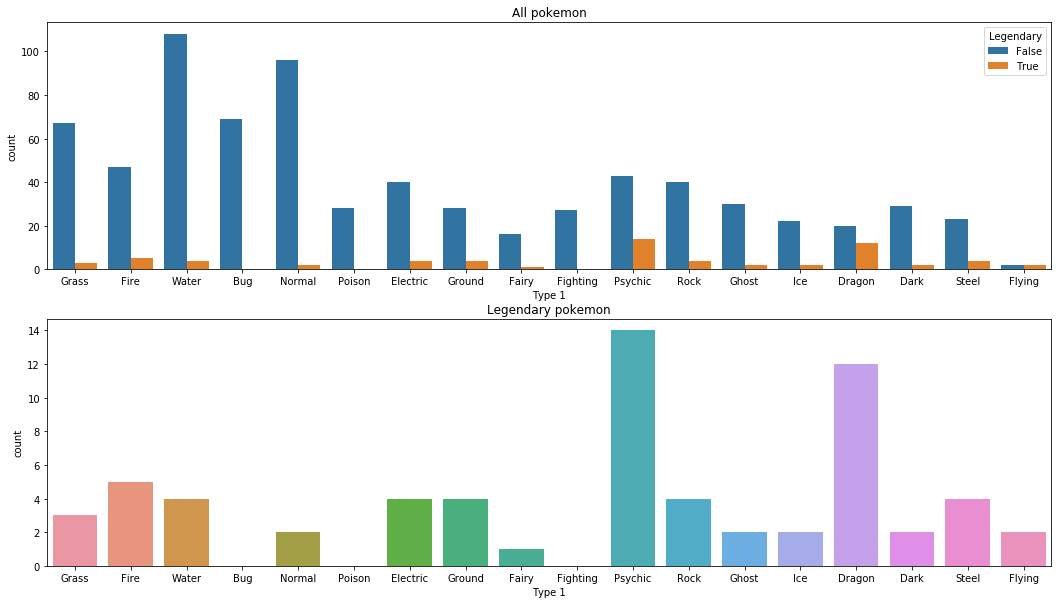

In [86]:
# Type 1 분포 시각화하기
plt.figure(figsize = (18, 10))

plt.subplot(211)
sns.countplot(data = pokemon, x = "Type 1", hue = "Legendary", order = types)
plt.title("All pokemon")

plt.subplot(212)
sns.countplot(data = legendary, x = "Type 1", order = types)
plt.title("Legendary pokemon")

plt.show()

그렇다면, 피벗테이블로 각 속성에 전설 포켓몬들이 몇 퍼센트씩 있는지 확인해봅시다.

In [88]:
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False).T

Type 1,Flying,Dragon,Psychic,Steel,Ground,Fire,Electric,Rock,Ice,Dark,Ghost,Fairy,Grass,Water,Normal,Poison,Fighting,Bug
Legendary,0.5,0.375,0.245614,0.148148,0.125,0.096154,0.090909,0.090909,0.083333,0.064516,0.0625,0.058824,0.042857,0.035714,0.020408,0.0,0.0,0.0


#### `Type 2` 데이터 분포 plot
Type 2는 어떨까요?    
참고로, Type 2에는 NaN(결측값)이 존재했었습니다. Countplot을 그릴 때에는 결측값은 자동으로 제외됩니다.

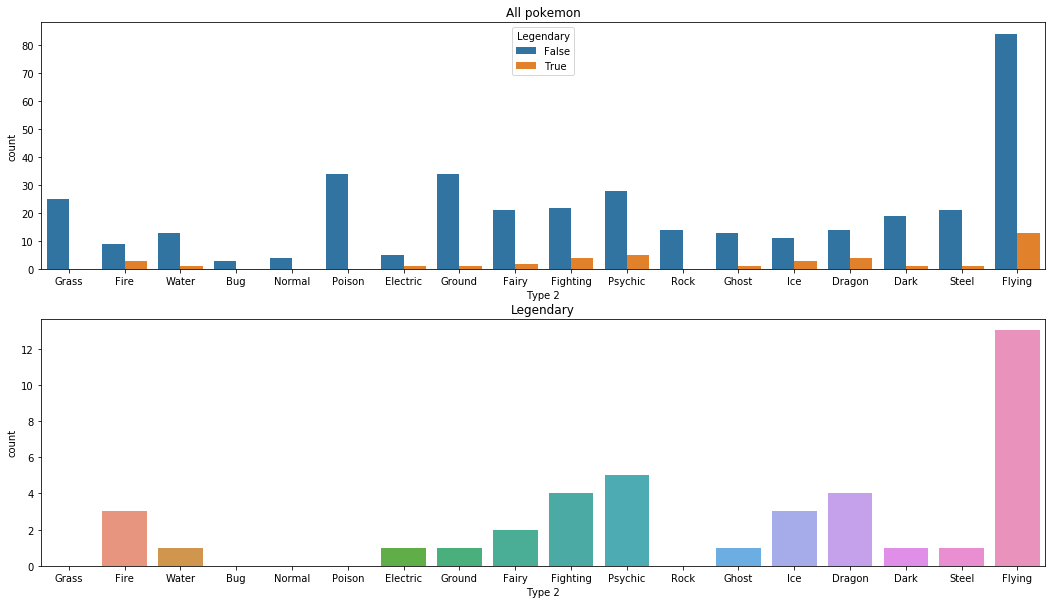

In [92]:
# Type 2 분포 시각화하기
plt.figure(figsize = (18, 10))

plt.subplot(211)
sns.countplot(data = pokemon, x = "Type 2", hue = "Legendary", order = types)
plt.title("All pokemon")

plt.subplot(212)
sns.countplot(data = legendary, x = "Type 2", order = types)
plt.title("Legendary")

plt.show()

Type 2 또한 일반 포켓몬과 전설 포켓몬의 분포 차이가 보입니다.    


역시 피벗 테이블로도 확인해볼까요?

In [94]:
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False).T

Type 2,Fire,Dragon,Ice,Electric,Fighting,Psychic,Flying,Fairy,Water,Ghost,Dark,Steel,Ground,Rock,Bug,Poison,Normal,Grass
Legendary,0.25,0.222222,0.214286,0.166667,0.153846,0.151515,0.134021,0.086957,0.071429,0.071429,0.05,0.045455,0.028571,0.0,0.0,0.0,0.0,0.0


### (4) `Total` : 모든 스탯의 총합

이번 실습에서 사용하는 데이터셋에 존재하는 포켓몬은 포켓몬의 체력인 **HP**, 물리공격력 **Attack**, 물리공격에 대한 방어력인 **Defense** , 특수공격력 (fire blast, bubble beam 등)인 **Sp. Atk** ,  특수공격에 대한 방어력인 **Sp. Def** , 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정(더 높은 포켓몬이 먼저 공격한다)하는 **Speed** 의 총 6가지의 스탯값을 가집니다. 

그리고 여기서 살펴볼 Total 컬럼은 이 6가지 속성값의 총 합입니다.

In [95]:
# 6가지 전체 스탯을 stats 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

#### `Total`값에 따른 분포 plot
그렇다면 Total값과 전설 포켓몬과는 어떤 관계가 있는지, 해당 컬럼에 따른 전설 포켓몬의 특징을 확인해봅시다.

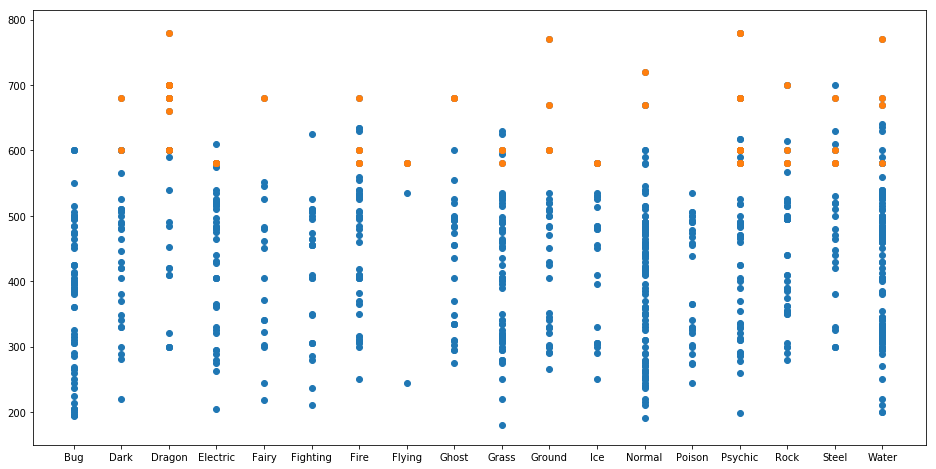

In [98]:
# 분포를 산점도로 표현하여 시각화해보기
plt.figure(figsize=(16,8))

plt.scatter(data = pokemon, x = "Type 1", y = "Total")
plt.scatter(data = legendary, x = "Type 1", y = "Total")
plt.show()

먼저 전설 포켓몬들의 속성 Total값을 확인해봅시다.

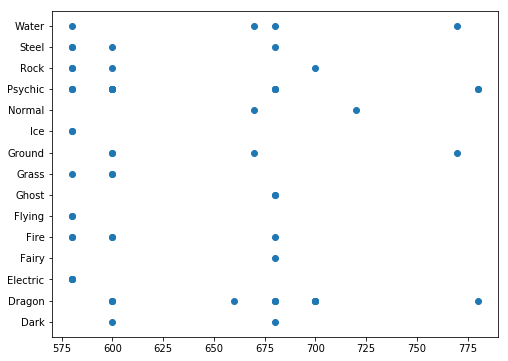

In [101]:
# 전설 포켓몬 속성 Total 값 확인하기
plt.figure(figsize =(8, 6))

plt.scatter(data = legendary, y = "Type 1", x = "Total")

plt.show()

데이터 시각화를 통해 특징이 보이는 것 같습니다.

실제로 전설의 포켓몬이 가지는 Total값들의 고유값을 확인해봅시다.

In [105]:
# 전설 포켓몬이 가지는 Total 고유값 확인하기
print(legendary['Total'].unique())
len(legendary['Total'].unique())

[580 680 780 600 700 670 770 720 660]


9

실제로 단 9가지 값밖에 존재하지 않는군요! 그래프로도 확인해 봅시다.

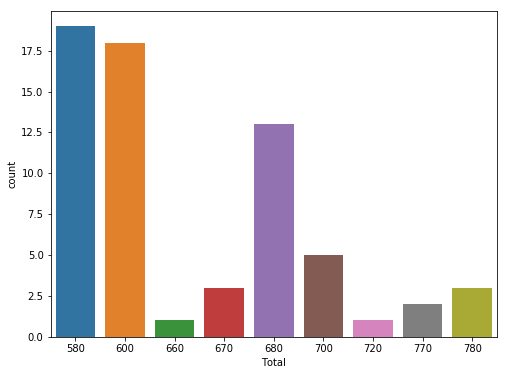

In [107]:
# 전설 포켓몬이 가지는 Total값에 대한 수 확인
plt.figure(figsize = (8,6))

sns.countplot(data = legendary, x = "Total")

plt.show()

총 65마리의 전설 포켓몬이 9개의 Total값만 가진다는 것은,

In [108]:
# Total 스탯값이 같은 전설 포켓몬 개수 확인
65 / 9

7.222222222222222

**약 7.22마리끼리는 같은 Total 스탯값을 가진다**는 의미와 같습니다. 이는 언뜻 봐도 꽤.. 높은 값인 것 같은 느낌을 주네요.

그렇다면 일반 포켓몬은 어떨까요? 같은 방법으로 다시 확인해봅시다.

In [110]:
# 일반 포켓몬이 가지는 Total 고유값 확인하기
print(ordinary['Total'].unique())
len(ordinary['Total'].unique())

[318 405 525 625 309 534 634 314 530 630 195 205 395 495 251 349 479 579
 253 413 262 442 288 438 320 485 300 450 275 365 505 273 323 483 299 270
 435 245 455 490 285 305 265 290 440 500 350 555 385 510 310 400 590 390
 335 515 410 315 325 465 352 460 475 600 328 330 480 520 425 340 345 295
 200 540 640 535 355 615 420 215 415 250 218 210 470 280 610 360 180 430
 336 380 700 635 220 240 198 278 518 618 269 414 670 266 456 236 237 474
 190 375 260 575 302 467 560 458 468 308 565 580 194 384 263 363 523 224
 424 244 482 348 498 452 329 411 454 334 494 594 545 528 418 255 370 281
 446 316 292 487 264 358 488 497 313 508 445 294 509 351 519 461 303 401
 567 473 428 464 319 472 489 471 484 550 307 409 423 382 499 213 369 507
 371 552 531 466 448 341 462 306 289 481 362 521 431 304 514]


195

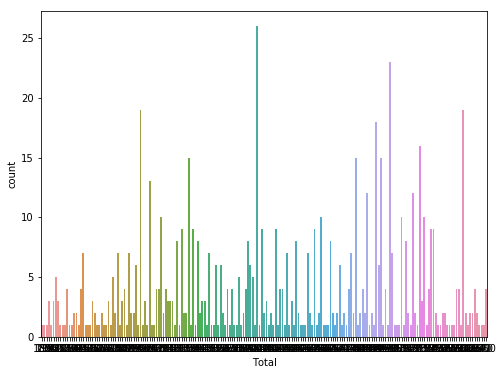

In [112]:
# 일반 포켓몬이 가지는 Total값에 대한 개수 시각화를 통해 확인하기
plt.figure(figsize = (8,6))
sns.countplot(data = ordinary, x = "Total")
plt.show()

일반 포켓몬은 총 195개의 Total 속성값을 가지고, 전체 일반 포켓몬은 (800 - 65), 즉 735마리이므로,

In [113]:
# Total 스탯값이 같은 일반 포켓몬 개수 확인
735/195

3.769230769230769

**약 3.77마리만 같은 Total 스탯값을 가지는군요.**   

### (5) Stats: `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`

그렇다면 총합인 Total 뿐만 아니라 각각의 stat에 대해서는 어떻게 분포되어 있을까요?    
subplot으로 여러 그래프를 한 번에 확인해봅시다.

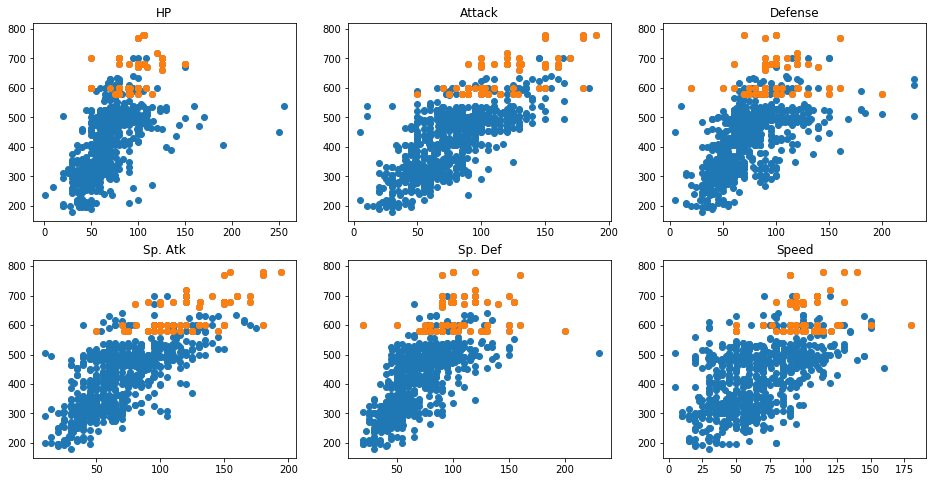

In [115]:
# 6가지 스탯 값 시각화하기 
plt.figure(figsize=(16,8))

plt.subplot(231)
plt.scatter(data=pokemon, y="Total", x="HP")
plt.scatter(data=legendary, y="Total", x="HP")
plt.title('HP')

plt.subplot(232)
plt.scatter(data=pokemon, y="Total", x="Attack")
plt.scatter(data=legendary, y="Total", x="Attack")
plt.title('Attack')

plt.subplot(233)
plt.scatter(data=pokemon, y="Total", x="Defense")
plt.scatter(data=legendary, y="Total", x="Defense")
plt.title('Defense')

plt.subplot(234)
plt.scatter(data=pokemon, y="Total", x="Sp. Atk")
plt.scatter(data=legendary, y="Total", x="Sp. Atk")
plt.title('Sp. Atk')

plt.subplot(235)
plt.scatter(data=pokemon, y="Total", x="Sp. Def")
plt.scatter(data=legendary, y="Total", x="Sp. Def")
plt.title('Sp. Def')

plt.subplot(236)
plt.scatter(data=pokemon, y="Total", x="Speed")
plt.scatter(data=legendary, y="Total", x="Speed")
plt.title('Speed')

plt.show()

- **`HP`, `Defense`, `Sp. Def`**
- **`Attack`, `Sp. Atk`, `Speed`**

### (6) `Generation` : 포켓몬의 세대

Generation은 각 포켓몬의 "세대"를 나타냅니다.    
   
각 세대에 대한 포켓몬의 수를 확인해 봅시다.

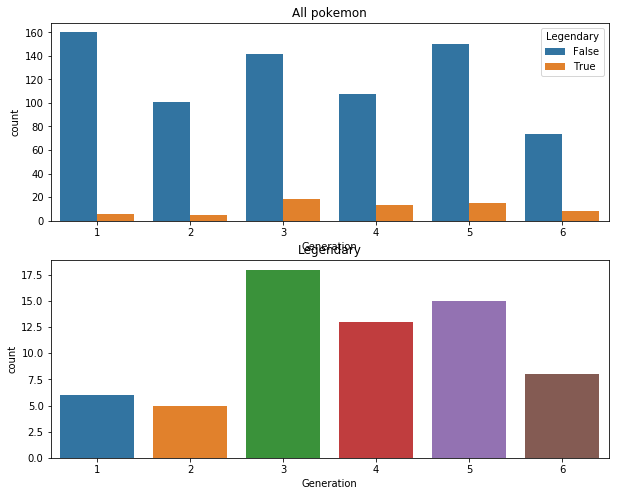

In [119]:
# 세대별 데이터 시각화 
plt.figure(figsize=(10, 8))

plt.subplot(211)
sns.countplot(data = pokemon, x = "Generation", hue = "Legendary")
plt.title("All pokemon")

plt.subplot(212)
sns.countplot(data = legendary, x = "Generation")
plt.title("Legendary")
plt.show()
